In [2]:
!pip3 install transformers

In [3]:
!pip3 install tf2onnx

     |████████████████████████████████| 378kB 9.2MB/s 
     |████████████████████████████████| 12.2MB 256kB/s 


In [4]:
!pip3 install onnxruntime-gpu

     |████████████████████████████████| 29.9MB 89kB/s 


In [5]:
pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 36kB/s 
     |████████████████████████████████| 4.0MB 46.1MB/s 
     |████████████████████████████████| 4.0MB 28.4MB/s 
     |████████████████████████████████| 1.2MB 40.5MB/s 
     |████████████████████████████████| 471kB 17.4MB/s 
     |████████████████████████████████| 6.0MB 27.3MB/s 
     |████████████████████████████████| 4.9MB 40.8MB/s 
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.4.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.34.1 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement h5py~=2.10.0, but you'll have h5py 3.1.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 2.5.0 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: h5py 2

In [18]:
from transformers import GPT2Tokenizer, TFGPT2Model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = TFGPT2Model.from_pretrained('gpt2')
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='tf')
output = model(encoded_input)

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


In [ ]:
import tensorflow as tf

In [ ]:
with tf.device("/gpu:0"):
  tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
  model = TFGPT2Model.from_pretrained('gpt2')
  text = "Replace me by any text you'd like."
  encoded_input = tokenizer(text, return_tensors='tf')  

with tf.Session() as sess:
  output = model(encoded_input)

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


AttributeError: ignored

In [ ]:
output

TFBaseModelOutputWithPast([('last_hidden_state',
                            <tf.Tensor: shape=(1, 10, 768), dtype=float32, numpy=
                            array([[[ 0.16212614, -0.21588612, -0.14169718, ..., -0.2614252 ,
                                     -0.08208853,  0.00903469],
                                    [ 0.462718  ,  0.0247802 , -0.07850037, ..., -0.08602741,
                                      0.5116985 , -0.39420253],
                                    [-0.06408698,  0.15478182, -0.6306322 , ...,  0.24884982,
                                      0.36889735,  0.08327539],
                                    ...,
                                    [-0.5588062 , -0.44919232, -1.4540863 , ...,  0.16513313,
                                     -0.13031651, -0.37356028],
                                    [ 0.13995773, -0.38752735, -0.7908871 , ..., -0.17763196,
                                      0.18202338,  0.21815233],
                                    [ 

In [19]:
model.save_pretrained("./tfgpt2model", saved_model=True)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

INFO:tensorflow:Assets written to: ./tfgpt2model/saved_model/1/assets


INFO:tensorflow:Assets written to: ./tfgpt2model/saved_model/1/assets


In [20]:
!python -m tf2onnx.convert --saved-model ./tfgpt2model/saved_model/1 --opset 11  --output model.onnx

2021-05-20 03:09:17.369722: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2021-05-20 03:09:18.587908: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-05-20 03:09:18.594883: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-20 03:09:18.595422: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBan

In [7]:
!nvidia-smi

Thu May 20 03:03:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [21]:
inputs_onnx = {k: v.numpy() for k, v in encoded_input.items()}
encoded_input

{'input_ids': <tf.Tensor: shape=(1, 10), dtype=int32, numpy=
array([[3041, 5372,  502,  416,  597, 2420,  345, 1549,  588,   13]],
      dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 10), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}

In [ ]:
inputs_onnx_1 = {}

for k in encoded_input:
  inputs_onnx_1[k] = encoded_input.get(k).numpy()

In [ ]:
inputs_onnx

{'attention_mask': array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32),
 'input_ids': array([[3041, 5372,  502,  416,  597, 2420,  345, 1549,  588,   13]],
       dtype=int32)}

In [22]:
inputs_onnx['attention_mask:0'] = inputs_onnx['attention_mask']
del inputs_onnx['attention_mask']

inputs_onnx['input_ids:0'] = inputs_onnx['input_ids']
del inputs_onnx['input_ids']


In [23]:
from onnxruntime import GraphOptimizationLevel, InferenceSession, SessionOptions, get_all_providers
from contextlib import contextmanager
from dataclasses import dataclass
from time import time
from tqdm import trange

def create_model_for_provider(model_path: str, provider: str) -> InferenceSession: 
  
  assert provider in get_all_providers(), f"provider {provider} not found, {get_all_providers()}"

  # Few properties that might have an impact on performances (provided by MS)
  options = SessionOptions()
  options.intra_op_num_threads = 1
  options.graph_optimization_level = GraphOptimizationLevel.ORT_ENABLE_ALL

  # Load the model as a graph and prepare the CPU backend 
  session = InferenceSession(model_path, options, providers=[provider])
  session.disable_fallback()
    
  return session

@contextmanager
def track_infer_time(buffer: [int]):
    start = time()
    yield
    end = time()

    buffer.append(end - start)


@dataclass
class OnnxInferenceResult:
  model_inference_time: [int]  
  optimized_model_path: str

In [24]:
from transformers import GPT2Tokenizer, GPT2Model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2')
text = "Replace me by any text you'd like."
model_inputs = tokenizer(text, return_tensors='pt')
output = model(**model_inputs)

Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.1.attn.masked_bias', 'h.0.attn.masked_bias', 'h.8.attn.masked_bias', 'h.6.attn.masked_bias', 'h.4.attn.masked_bias', 'h.10.attn.masked_bias', 'h.7.attn.masked_bias', 'h.9.attn.masked_bias', 'h.11.attn.masked_bias', 'h.5.attn.masked_bias', 'h.3.attn.masked_bias', 'h.2.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
from tqdm import trange

PROVIDERS = {
    ("cpu", "PyTorch CPU"),
#  Uncomment this line to enable GPU benchmarking
    ("cuda:0", "PyTorch GPU")
}

results = {}

for device, label in PROVIDERS:
    
    # Move inputs to the correct device
    model_inputs_on_device = {
        arg_name: tensor.to(device)
        for arg_name, tensor in model_inputs.items()
    }
    
    model_pt = GPT2Model.from_pretrained('gpt2').to(device)
    for _ in trange(10, desc="Warming up"):
      model_pt(**model_inputs_on_device)

    # Compute 
    time_buffer = []
    for _ in trange(100, desc=f"Tracking inference time on PyTorch"):
      with track_infer_time(time_buffer):
        model_pt(**model_inputs_on_device)

    # Store the result
    results[label] = OnnxInferenceResult(
        time_buffer, 
        None
    )

Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.1.attn.masked_bias', 'h.0.attn.masked_bias', 'h.8.attn.masked_bias', 'h.6.attn.masked_bias', 'h.4.attn.masked_bias', 'h.10.attn.masked_bias', 'h.7.attn.masked_bias', 'h.9.attn.masked_bias', 'h.11.attn.masked_bias', 'h.5.attn.masked_bias', 'h.3.attn.masked_bias', 'h.2.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Tracking inference time on PyTorch: 100%|██████████| 100/100 [00:08<00:00, 11.82it/s]
Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.1.attn.masked_bias', 'h.0.attn.masked_bias', 'h.8.attn.masked_bias', 'h.6.attn.masked_bias', 'h.4.attn.masked_bias', 'h.10.attn.masked_bias', 'h.7.attn.masked_bias', 'h.9.attn.masked_bias', 'h.11.attn.masked_bias', 'h.5.attn.masked_bias', 'h.3.attn.masked_bias', 'h.2.attn.masked_bias']
You s

In [26]:
PROVIDERS = {
    ("CPUExecutionProvider", "ONNX CPU"),
#  Uncomment this line to enable GPU benchmarking
     ("CUDAExecutionProvider", "ONNX GPU")
}

for provider, label in PROVIDERS:
    # Create the model with the specified provider
    model = create_model_for_provider("model.onnx", provider)

    # Keep track of the inference time
    time_buffer = []

    # Warm up the model
    model.run(None, inputs_onnx)

    # Compute 
    for _ in trange(100, desc=f"Tracking inference time on {provider}"):
      with track_infer_time(time_buffer):
          model.run(None, inputs_onnx)

    # Store the result
    results[label] = OnnxInferenceResult(
      time_buffer,
      model.get_session_options().optimized_model_filepath
    )

Tracking inference time on CPUExecutionProvider: 100%|██████████| 100/100 [00:04<00:00, 21.09it/s]


In [27]:
results

{'ONNX CPU': OnnxInferenceResult(model_inference_time=[0.05252265930175781, 0.046546220779418945, 0.04597878456115723, 0.04795074462890625, 0.04578113555908203, 0.05024838447570801, 0.04876351356506348, 0.050592660903930664, 0.04778122901916504, 0.047232866287231445, 0.04589414596557617, 0.050066471099853516, 0.04732656478881836, 0.04545712471008301, 0.04859519004821777, 0.04594111442565918, 0.04946494102478027, 0.04877948760986328, 0.045680999755859375, 0.05142545700073242, 0.04732775688171387, 0.047530174255371094, 0.04566645622253418, 0.04671931266784668, 0.0447542667388916, 0.046294212341308594, 0.04754185676574707, 0.046637535095214844, 0.047631263732910156, 0.048131704330444336, 0.0467836856842041, 0.04854154586791992, 0.0485386848449707, 0.04614758491516113, 0.04587507247924805, 0.046703338623046875, 0.04484844207763672, 0.04544234275817871, 0.04614996910095215, 0.04445171356201172, 0.04477667808532715, 0.048818349838256836, 0.04886603355407715, 0.04680037498474121, 0.0462834835

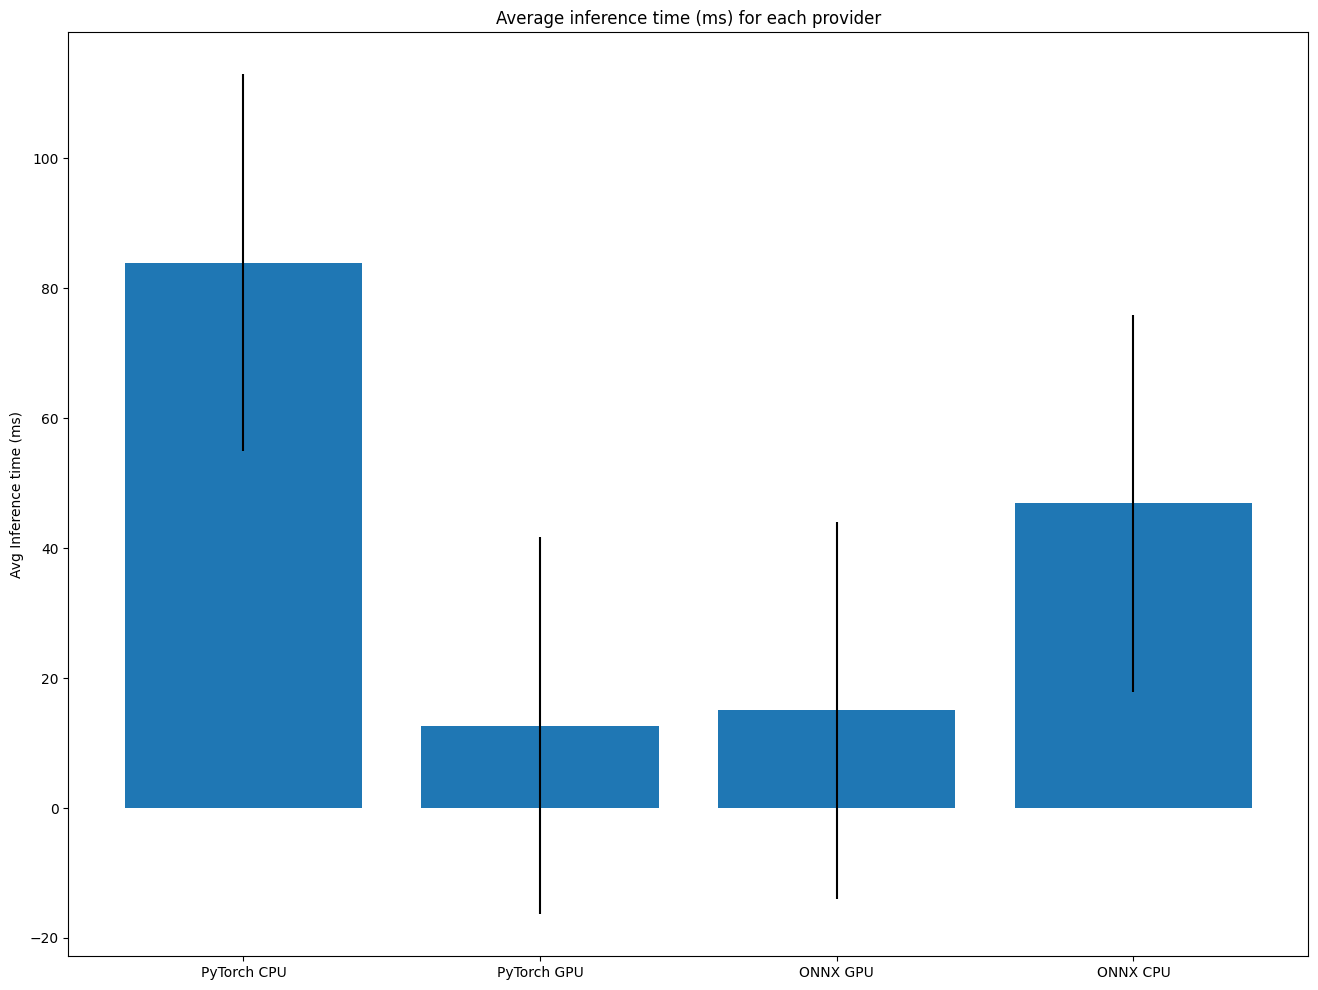

In [28]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os


# Compute average inference time + std
time_results = {k: np.mean(v.model_inference_time) * 1e3 for k, v in results.items()}
time_results_std = np.std([v.model_inference_time for v in results.values()]) * 1000

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(16, 12))
ax.set_ylabel("Avg Inference time (ms)")
ax.set_title("Average inference time (ms) for each provider")
ax.bar(time_results.keys(), time_results.values(), yerr=time_results_std)
plt.show()

In [33]:
time_results

{'ONNX CPU': 46.90088510513306,
 'ONNX GPU': 15.021083354949951,
 'PyTorch CPU': 83.90347719192505,
 'PyTorch GPU': 12.650859355926514}

In [36]:
{k: v *100 for k,v in time_results.items()}

{'ONNX CPU': 4690.088510513306,
 'ONNX GPU': 1502.1083354949951,
 'PyTorch CPU': 8390.347719192505,
 'PyTorch GPU': 1265.0859355926514}

In [30]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2199.998
BogoMIPS:            4399.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin